In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from netCDF4 import Dataset

from shallow_water import create_anim

plt.rcParams['animation.html'] = 'html5'
%load_ext autoreload
%autoreload 2

In [2]:
%%time
from rotate_sw import RotateSW

Lx = Ly = 1e6
dx = dy = 2e3
steps = 10000

sw = RotateSW(dx, dy, Lx, Ly)

sw.eta[1:-1,1:-1] = sw.set_gaussian(Lx/2., 0., 5e4)
# sw.alpha /= 2.
# sw.eta[1:-1,1:-1] = 0.
# sw.eta[40:60, 40:60] = 0.4
sw.simulate(steps)
sw.print_info()

100%|██████████| 10000/10000 [05:14<00:00, 31.80it/s]

Height:        100.0
Coriolis:      1e-05
Basin widths:  1000000.0 1000000.0
Grid spacing:  2000.0 x 2000.0
Grid size:     (502, 502)
Rossby radius: 100000.0
CPU times: user 4min 24s, sys: 48.3 s, total: 5min 12s
Wall time: 5min 14s


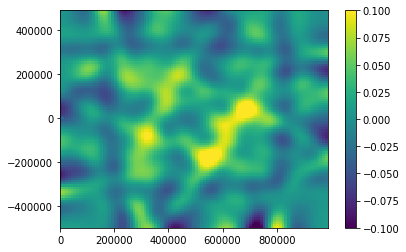

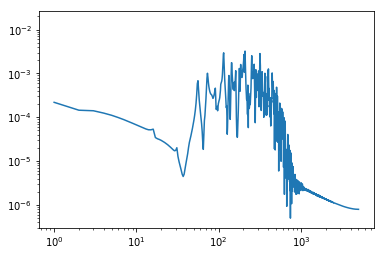

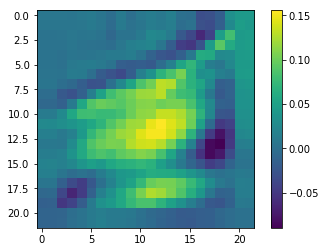

In [5]:
with Dataset("SW_L1000000.0_dx10000.0.nc", 'r') as df:
    eta = df['eta'][:, 50, 25]
    x = df["x"][:]
    y = df["y"][:]
    
# eta = ETA[:, 25, 75]
plt.plot(eta)
plt.show()

from fourier import npfft, fourier_transform

n, fft = npfft(eta)
plt.plot(fft)
plt.loglog()
plt.show()

plt.imshow(sw.eta)
plt.colorbar()
plt.show()

In [3]:
with Dataset(sw.fname, 'r') as df:
    ETA = df['eta'][:]
#     U = df['uvel'][:]
#     V = df['vvel'][:]
    x = df['x'][:]
    y = df['y'][:]

create_anim(x, y, ETA[::100])

17it [00:08,  1.68it/s]                        

## Kelvin wave at boundary

In [8]:
%%time
from rotate_sw import RotateSW

Lx = Ly = 1e6
dx = dy = 5e3
steps = 400
interval = 2

sw = RotateSW(dx, dy, Lx, Ly)
sw.eta[1:-1,1:-1] = sw.set_gaussian(0., 0., 5e4)
sw.alpha *= 0.9
ETA = sw.simulate(steps)
sw.print_info()

100%|██████████| 400/400 [00:01<00:00, 200.33it/s]


165.941901934 165.941901934
Height:        100.0
Coriolis:      1e-05
Basin widths:  1000000.0 1000000.0
Grid spacing:  5000.0 x 5000.0
Grid size:     (202, 202)
Rossby radius: 100000.0
CPU times: user 1.8 s, sys: 313 ms, total: 2.11 s
Wall time: 4.18 s


In [9]:
with Dataset("SW_L1000000.0_dx5000.0.nc", 'r') as df:
    eta = df['eta'][:, 100, 50]
    x = df["x"][:]
    y = df["y"][:]

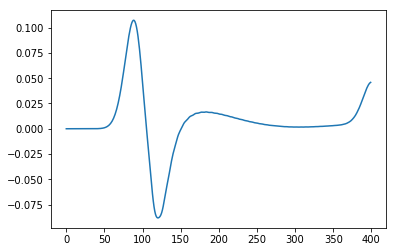

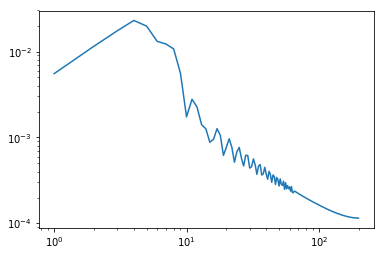

In [11]:
# eta = ETA[:, 25, 75]
plt.plot(eta)
plt.show()

from fourier import npfft, fourier_transform

n, fft = npfft(eta)
plt.plot(fft)
plt.loglog()
plt.show()

In [12]:
with Dataset("SW_L1000000.0_dx5000.0.nc", 'r') as df:
    ETA = df['eta'][:]
#     U = df['uvel'][:]
#     V = df['vvel'][:]
    x = df['x'][:]
    y = df['y'][:]

create_anim(x, y, ETA)